In [55]:
# 1. Image Classification Project

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

In [57]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


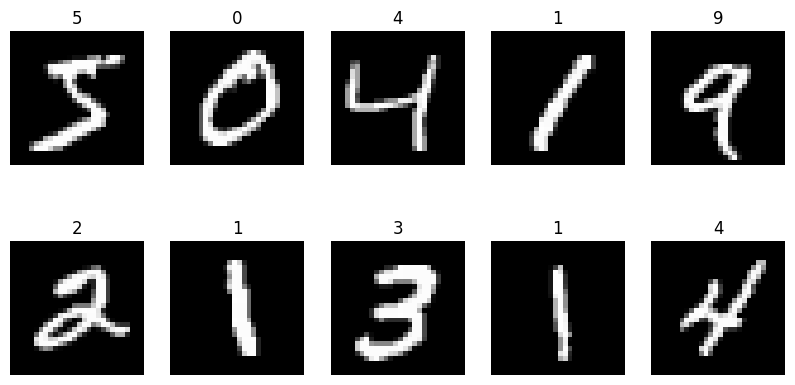

In [58]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [59]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Normalization Done")

Normalization Done


In [60]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

In [61]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [62]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)

y_pred_lr = lr_model.predict(X_test_flat)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9264


In [63]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

c:\Users\ADMIN\OneDrive\Desktop\vscode files\work\Task_05\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.9539 - loss: 0.1520 - val_accuracy: 0.9827 - val_loss: 0.0569
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9852 - val_loss: 0.0503
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9890 - val_loss: 0.0384
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0.9862 - val_loss: 0.0452
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.9897 - val_loss: 0.0374


In [65]:
test_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)

print("CNN Accuracy:", cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9902 - loss: 0.0316
CNN Accuracy: 0.9901999831199646


In [66]:
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

cm = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion Matrix:
 [[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1129    1    1    0    1    1    1    1    0]
 [   0    0 1024    0    1    0    0    6    1    0]
 [   0    0    2 1000    0    6    0    0    2    0]
 [   0    0    0    0  979    0    0    0    1    2]
 [   3    0    0    5    0  882    1    0    0    1]
 [   4    2    0    0    4    3  943    0    2    0]
 [   0    2    0    0    0    1    0 1021    0    4]
 [   4    0    3    1    1    3    0    1  959    2]
 [   0    0    2    1   11    3    0    4    2  986]]


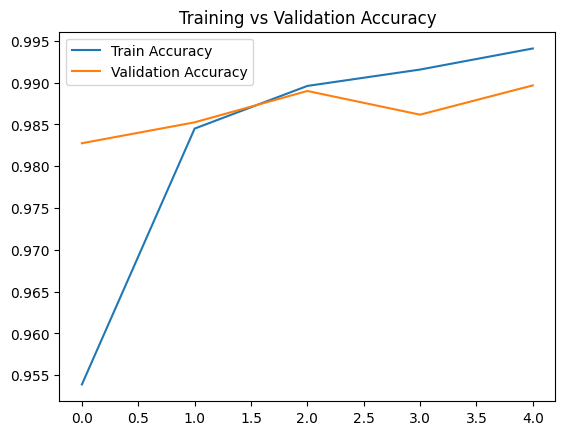

In [67]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [68]:
# 2. Image Processing Mini Tasks

In [69]:
import cv2

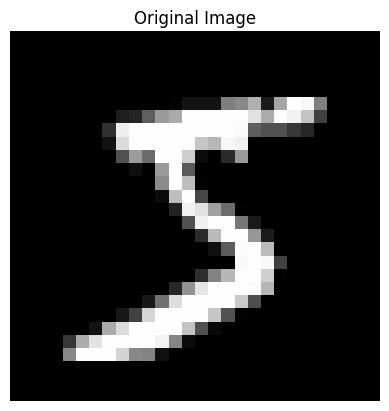

In [70]:
sample_image = X_train[0]

plt.imshow(sample_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

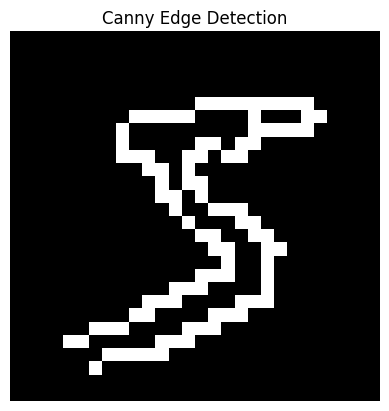

In [71]:
sample_uint8 = (sample_image * 255).astype('uint8')

edges = cv2.Canny(sample_uint8, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

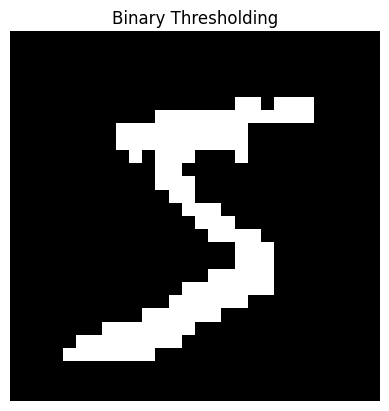

In [72]:
_, thresh = cv2.threshold(sample_uint8, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.title("Binary Thresholding")
plt.axis('off')
plt.show()

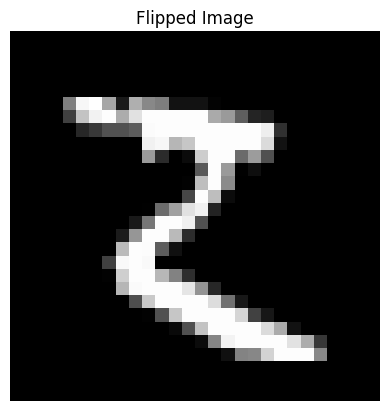

In [73]:
flipped = cv2.flip(sample_uint8, 1)

plt.imshow(flipped, cmap='gray')
plt.title("Flipped Image")
plt.axis('off')
plt.show()

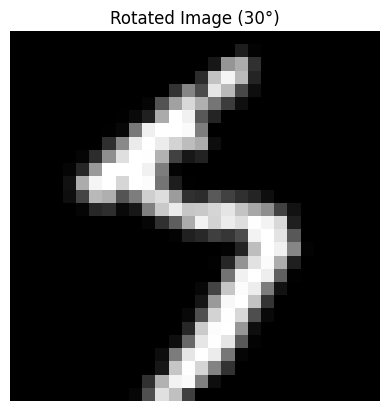

In [74]:
(h, w) = sample_uint8.shape
center = (w // 2, h // 2)

matrix = cv2.getRotationMatrix2D(center, 30, 1.0)
rotated = cv2.warpAffine(sample_uint8, matrix, (w, h))

plt.imshow(rotated, cmap='gray')
plt.title("Rotated Image (30°)")
plt.axis('off')
plt.show()

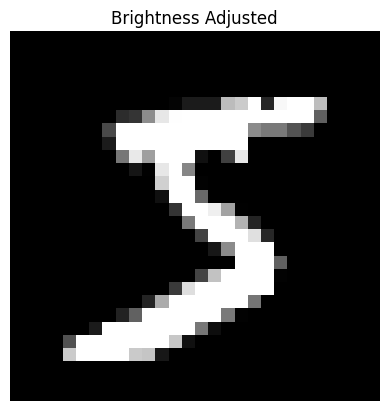

In [75]:
bright = cv2.convertScaleAbs(sample_uint8, alpha=1.2, beta=50)

plt.imshow(bright, cmap='gray')
plt.title("Brightness Adjusted")
plt.axis('off')
plt.show()

In [76]:
# 3. Mini Deployment Project 

In [77]:
# Digit Recognition Web App

In [78]:
cnn_model.save("mnist_cnn_model.h5")
print("Model Saved Successfully ")

Model Saved Successfully 


In [79]:
import joblib
joblib.dump(lr_model, "mnist_lr_model.pkl")

['mnist_lr_model.pkl']

In [80]:
# Test

In [81]:
from PIL import Image
import matplotlib.pyplot as plt

img = (X_test[0] * 255).astype('uint8')
Image.fromarray(img).save("test_digit.png")